Решение SimpleControlProblem непрерывным алгоритмом A3C 

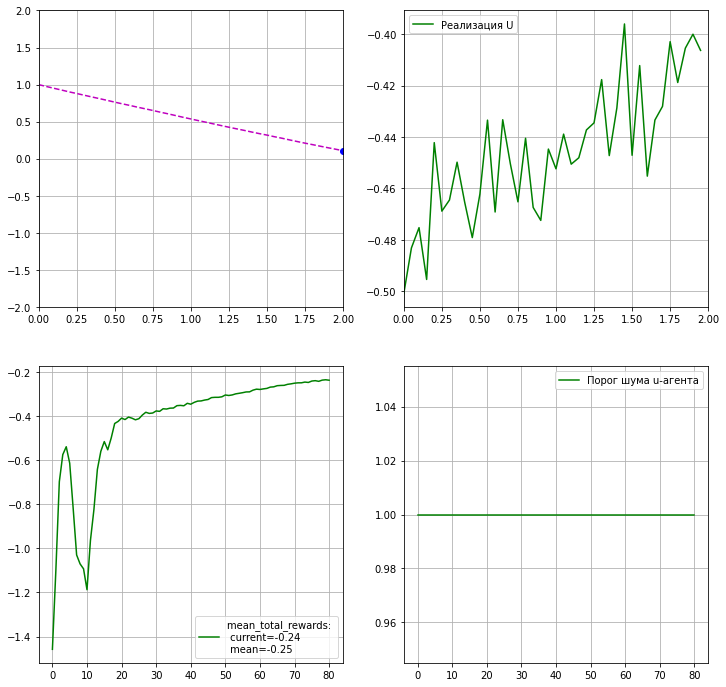

KeyboardInterrupt: 

In [1]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))

import torch.nn as nn
from Agents.Utilities.SequentialNetwork import SequentialNetwork
from Agents.A2C import A2C_Continuous
from Agents.Utilities.AsynchronousAgentMaker import AsynchronousAgentMaker
from Environments.SimpleControlProblem.SimpleControlProblem import SimpleControlProblem
from Environments.SimpleControlProblem.SimpleControlProblemVisualizer import SimpleControlProblemVisualizer
import Solvers.OneAgentSolver as solver
from Agents.Utilities.Noises import UniformNoise
%load_ext autoreload
%autoreload 2


#learning parameters
episode_n = 101
session_n = 10

#environment initialization
env = SimpleControlProblem()

#agent initialization
pi_model = SequentialNetwork([env.state_dim, 128, 1], nn.ReLU())
v_model = SequentialNetwork([env.state_dim, 128, 1], nn.ReLU())
noise = UniformNoise(action_dim=env.action_dim, threshold_decrease=1/(episode_n * session_n))
agent = A2C_Continuous(env.action_min, env.action_max, pi_model, v_model, noise,
                       gamma=1, pi_model_lr=1e-3, v_model_lr=1e-3, entropy_threshold=0.01)
agent = AsynchronousAgentMaker(agent)

#learning
visualizer = SimpleControlProblemVisualizer(waiting_for_show=10)
solver.go_asynchronously(env, agent, episode_n=episode_n, show=visualizer.show, session_len=2500, session_n=session_n)
